#  Автоэнкодеры

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://www.eecs.qmul.ac.uk/~sgg/_ECS795P_/papers/WK07-8_PyTorch_Tutorial2.html
* https://www.youtube.com/watch?v=zp8clK9yCro
* https://medium.com/@rekalantar/variational-auto-encoder-vae-pytorch-tutorial-dce2d2fe0f5f
* https://towardsdatascience.com/conditional-variational-autoencoders-with-learnable-conditional-embeddings-e22ee5359a2a
* https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#sphx-glr-auto-examples-others-plot-visualization-utils-py

## Задачи для совместного разбора

1\. Обсудите основные шаги в обучении автокодировщиков.

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите набор данных MNIST из пакета `torchvision` (данный набор уже разбит на обучающее и тестовое множество).

Создайте и обучите модель автокодировщика, используя только полносвязные слои и функции активации.

Кодировщик - это функция вида
$z = f_\theta(x)$
,где $\theta$ - это параметры кодировщика.

Декодировщик - это функция вида
$\hat{x} = g_\phi(z)$
,где $\phi$ - это параметры декодировщика.

В нашем случае оба компонента представляют собой нейронные сети. Скрытое представление, полученное после части-кодировщика, должно иметь размерность 2. Последним слоем части-декодеровщика сделайте сигмоиду.

В качестве функции потерь используйте `MSELoss` между исходным и восстановленным изображением $MSE(x, \hat{x})$.

Обратите внимание, что во время обучения метки классов не используются.


- [ ] Проверено на семинаре

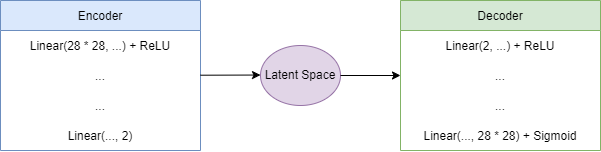

<p class="task" id="2"></p>

2\. Получите один батч из тестового множества. Используя модель, обученную в предыдущем задании, получите скрытые представления для всех изображений из этого батча и визуализируйте на плоскости (они должны иметь размерность 2!). Раскрасьте точки в цвета, соответствующие меткам класса изображений (цифрам).

Возьмите одно изображение из тестового множества и пропустите его через обученный автокодировщик. Визуализируйте рядом (по горизонтали) два изображения: исходное и после восстановления автокодировщиком.


- [ ] Проверено на семинаре

<p class="task" id="3"></p>

3\. Напишите функцию для генерации изображения на основе случайного шума. Функция должна генерировать случайный шум из стандартного нормального распределения и пропускать его через часть-декодировщик. Сгенерируйте несколько изображений и визуализируйте в виде сетки из картинок.

- [ ] Проверено на семинаре

<p class="task" id="4"></p>

4\. Создайте и обучите модель условного автокодировщика, используя только полносвязные слои и функции активации.

Отличие от предыдущего варианта заключается в том, что теперь функции кодировщика и декодировщика принимают на вход также метку класса:
$$z = f_\theta(x, c)$$
$$\hat{x} = g_\phi(z, c)$$

Таким образом, теперь во теперь время обучения метки классов используются. Задействуйте их следующим образом: представьте метки классов в виде one-hot кодировки и объедините с пикселями изображения (для этого адаптируйте размерность слоев).

Скрытое представление, полученное после части-кодировщика, должно иметь размерность 2. Последним слоем части-декодеровщика сделайте сигмоиду. В качестве функции потерь используйте `MSELoss` между исходным и восстановленным изображением $MSE(x, \hat{x})$.


- [ ] Проверено на семинаре

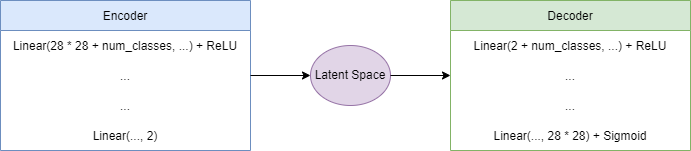

<p class="task" id="5"></p>

5\. Напишите функцию для генерации изображения на основе случайного шума. Функция должна генерировать случайный шум из стандартного нормального распределения и one-hot представление цифры. Далее объединенный вектор пропускается его через часть-декодировщик. Сгенерируйте несколько изображений и визуализируйте в виде сетки из картинок.

- [ ] Проверено на семинаре

<p class="task" id="6"></p>

6\. Создайте и обучите модель вариационного автокодировщика, используя только полносвязные слои и функции активации.

Кодировщик - это функция следующего вида:
$$q_\phi(z|x) = \mathcal{N}(\mu_\phi(x), \sigma_\phi^2(x))$$

Здесь $\phi$ - параметры кодировщика, а $\mu_\phi(x)$ и $\sigma_\phi^2(x)$ - это обучаемые функции (в нашем случае - полносвязные слои).

Чтобы иметь возможность обучить такую модель, используется т.н. reparametrization trick: на основе функций $\mu$ и $ \sigma$ считаем значение:

$$z = \mu_\phi(x) + \sigma_\phi(x) \odot \epsilon, \quad \epsilon \sim \mathcal{N}(0, I)$$

Декодировщик пытается восстановить исходное изображение из полученного вектора:

$$p_\theta(x|z) = f(z; \theta)$$

В качестве функции потерь обычно используется следующая:
$$\mathcal{L}_{total} = \mathcal{L}_{recon} + D_{KL}$$
$$\mathcal{L}_{recon} = -\sum_{i=1}^D [x_i \log \hat{x}_i + (1 - x_i) \log (1 - \hat{x}_i)]$$
$$D_{KL} = -\frac{1}{2} \sum_{j=1}^J (1 + \log \sigma_j^2 - \mu_j^2 - \sigma_j^2)$$


- [ ] Проверено на семинаре

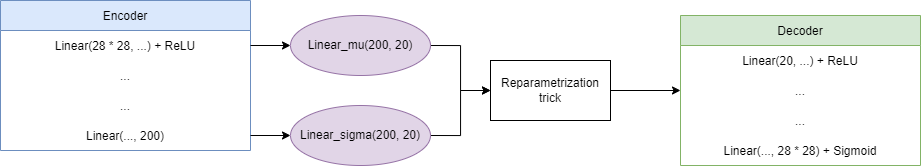

<p class="task" id="7"></p>

7\. Напишите функцию для генерации изображения на основе случайного шума. Функция должна генерировать случайный шум из стандартного нормального распределения. Далее вектор пропускается его через часть-декодировщик. Сгенерируйте несколько изображений и визуализируйте в виде сетки из картинок.

- [ ] Проверено на семинаре